In [1]:
from mlagents.trainers.demo_loader import demo_to_buffer
from mlagents.trainers.buffer import BufferKey, ObservationKeyPrefix
import torch
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [6]:
fname_demo = '/home/sungbeenpark/Drone/DroneDelivery-Hanyang_play/Assets/Demonstrations/Drone.demo'

In [7]:
behavior_spec, demo_buffer = demo_to_buffer(fname_demo, 1)
print(demo_buffer._fields.keys())

demo_to_array = lambda key: np.array(demo_buffer[key])
state = demo_to_array((ObservationKeyPrefix.OBSERVATION, 0))
action = demo_to_array(BufferKey.CONTINUOUS_ACTION)
reward = demo_to_array(BufferKey.ENVIRONMENT_REWARDS)
done = demo_to_array(BufferKey.DONE)

print('state:', state.shape)
print('action:', action.shape)
print('reward:', reward.shape)
print('done:', done.shape)

dict_keys([<BufferKey.DONE: 'done'>, <BufferKey.ENVIRONMENT_REWARDS: 'environment_rewards'>, (<ObservationKeyPrefix.OBSERVATION: 'obs'>, 0), (<ObservationKeyPrefix.OBSERVATION: 'obs'>, 1), <BufferKey.CONTINUOUS_ACTION: 'continuous_action'>, <BufferKey.PREV_ACTION: 'prev_action'>])
state: (265, 72, 128, 3)
action: (265, 3)
reward: (265,)
done: (265,)


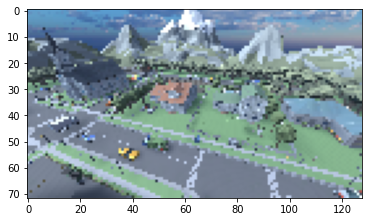

In [25]:
plt.imshow(state[90])

In [14]:
nstep = action.shape[0]

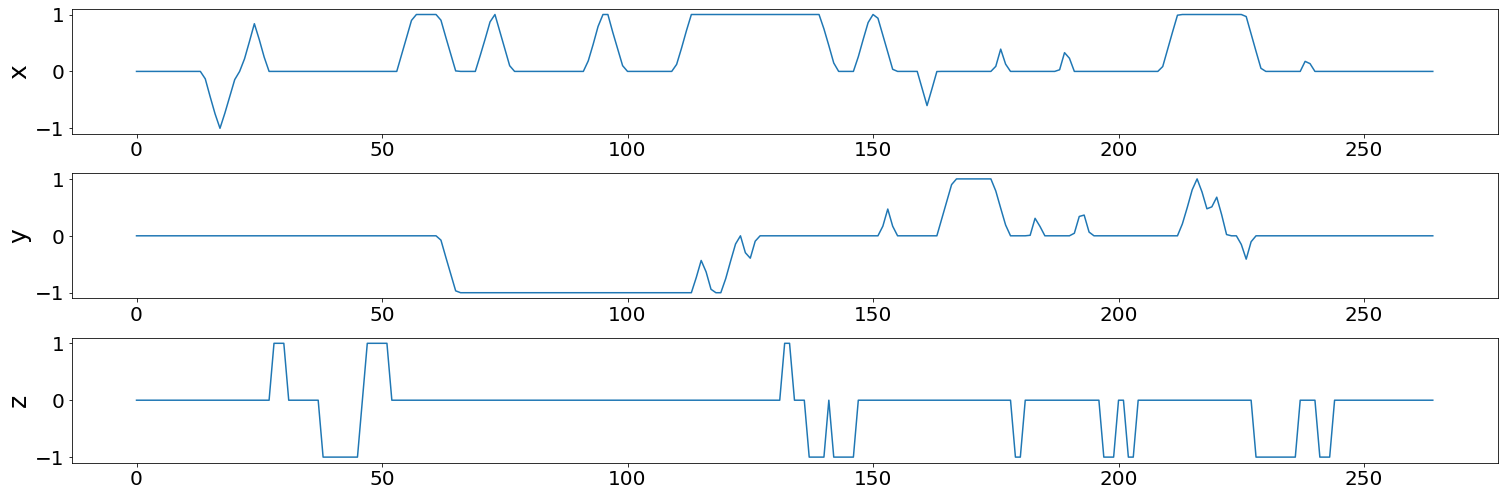

In [15]:
fig, axs = plt.subplots(nrows=3, figsize=(21,7))
for ii, r in enumerate(['x','y','z']):
    ax = axs[ii]
    ax.plot(range(nstep),action[:,ii])
    ax.set_ylabel(r, fontsize=25)
    ax.tick_params(axis='both', labelsize=20)
fig.tight_layout()

[(0.0, 1.5), Text(0.5, 0, 'Reward')]

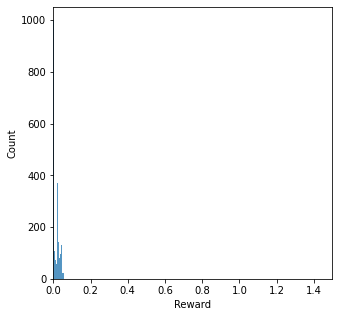

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.histplot(reward, ax=ax)
ax.set(xlim=(0,1.5), xlabel='Reward')

In [12]:
done.sum()

48